In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим случайный вектор $\xi$ = ($\xi_1$, $\xi_1$)$\sim$ $N(a, \Sigma)$, где $a = 0$, а $\Sigma = \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix}$.

In [3]:
distr = multivariate_normal(mean=[0, 0], cov=[[10, 8], [8, 10]])

Построим график плотности этого случайного вектора.

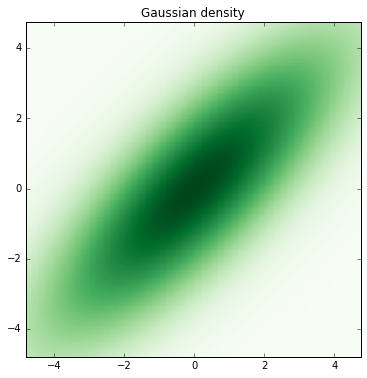

In [4]:
grid = np.mgrid[-5:5:0.05, -5:5:0.05]
density = np.array([[distr.pdf((grid[0, i, j], grid[1, i, j])) 
                     for i in range(grid[0].shape[0])]
                    for j in range(grid[0].shape[1])])

plt.figure(figsize=(6, 6))

plt.pcolormesh(grid[0], grid[1], density, cmap='Greens')
plt.xlim((np.min(grid[0]) + 0.2, np.max(grid[0]) - 0.2))
plt.ylim((np.min(grid[1]) + 0.2, np.max(grid[1]) - 0.2))
plt.title('Gaussian density')
plt.show()

Исследуем плотность условного распределения $ f_{{\xi_1}|{\xi_2}}(x|y) $.

In [6]:
# Рисует график условного распределения при y = y_condition
def show_conditional_density(y_condition) :
    
    # Генерируем сетку по оси x
    step = 0.01
    grid = np.arange(-10, 10, step)
    
    # Считаем условное распределение для всех точек сетки
    c_density = [distr.pdf((x, y_condition)) for x in grid]
    c_density /= step * np.sum(c_density)  # Делим на вероятность y = y_condition
    
    # Рисуем итоговый график
    plt.figure(figsize=(16, 6))
    plt.plot(grid, c_density)
    plt.title("Conditional density when $y = %s$" % y_condition)
    plt.show()

Строим графики плотности условного распределения $ f_{{\xi_1}|{\xi_2}}(x|y) $ для $y\in\{-3, 0, 1, 5\}$

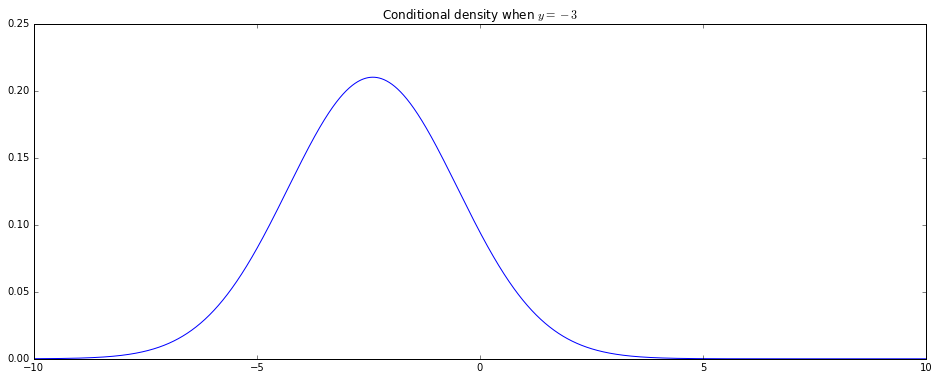

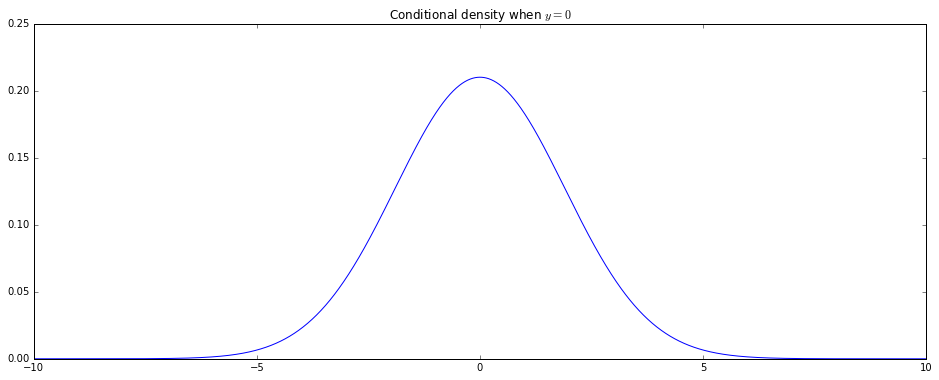

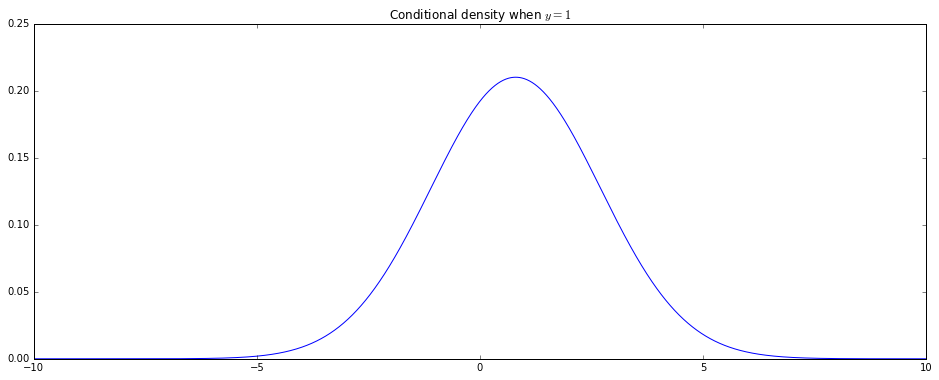

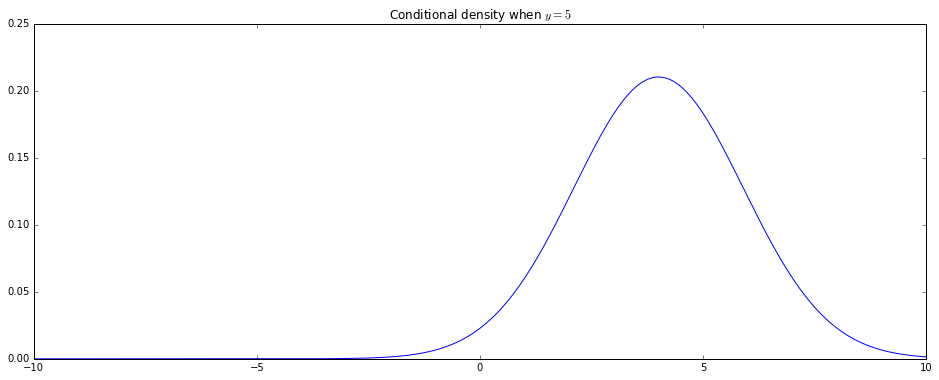

In [7]:
for y_condition in [-3, 0, 1, 5] :
    show_conditional_density(y_condition)

Теперь исследуем условное матожидание $ E(\xi_1|\xi_2 = y) $ как функцию от $y$.

In [13]:
# Расчитывает условное матожидание при xi_2 = y
def compute_conditional_mean(y) :
    step = 0.01
    grid = np.arange(-10, 10, step)
    return np.sum([distr.pdf((x, y)) * step * x for x in grid]) \
            / np.sum([distr.pdf((x, y)) * step for x in grid])

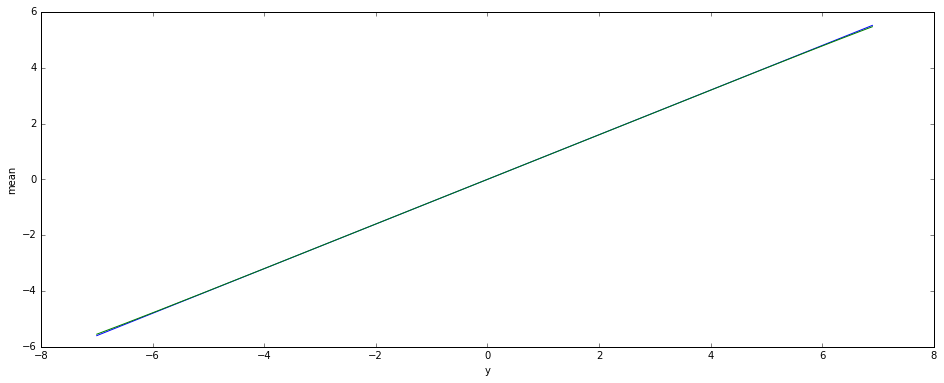

CPU times: user 23.2 s, sys: 268 ms, total: 23.4 s
Wall time: 23.3 s


In [18]:
%%time
# Генерируем сетку по y
grid = np.arange(-7, 7, 0.1)
expected = grid * (4. / 5.)  # Теоретическое значение матожидания
actual = list(map(compute_conditional_mean, grid))

# Строим график зависимости условного матожидания от y
plt.figure(figsize=(16, 6))
plt.plot(grid, expected, label='$ y=\\frac{4}{5}x $')
# Добавляем график прямой x = E xi_1
plt.plot(grid, actual, label='$ E(\\xi_1|\\xi_2 = y) $')
plt.xlabel('y')
plt.ylabel('mean')
plt.show()

Вывод: $ E(\xi_1|\xi_2 = y) = \frac{4}{5}y $